# Handypreisanalyse

In [11]:
import requests
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Analyse: Samsung / Galaxy S

In [78]:
product_list = [
    [0, 'Galaxy S1', 535151],
    [1, 'Galaxy S2', 615532],
    [2, 'Galaxy S3', 772300],
    [3, 'Galaxy S4', 917778],
    [4, 'Galaxy S5', 1075683],
    [5, 'Galaxy S6', 1237277],
    [6, 'Galaxy S7', 1397048],
    [7, 'Galaxy S8', 1601178],
    [8, 'Galaxy S9', 1776751]
]

product_names = []
for n in product_list:
    product_names.append(n[1])

df_target = pd.DataFrame()

for product in product_list:
    url = 'https://geizhals.de/?phist='+str(product[2])+'&age=9999'
    r = requests.get(url).text
       
    prices = r.split('_gh.plot(')[1].split(', ')[1]
    prices = ast.literal_eval(prices)
    
    df = pd.DataFrame.from_dict(prices)
    df.columns = ['timestamp', 'price']
    
    df['timestamp'] = df['timestamp'].apply(lambda x: x / 1000)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
       
    df['product'] = product[1]
    df['market_day'] = df.index
    df['price_avg_week'] = df['price'].rolling(7).mean()
    df['price_perc'] = df['price'] / df['price'][0]
    df['price_perc_week'] = df['price_perc'].rolling(7).mean()
    
    df = df[df['market_day'] < 1000]
    
    df_target = df_target.append(df, ignore_index=True)
    
    time.sleep(1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


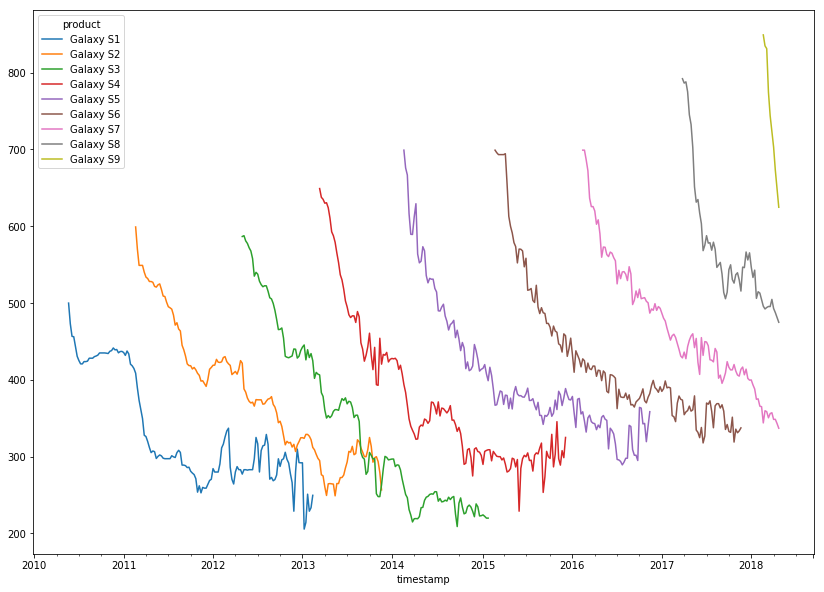

In [79]:
df_show = df_target.pivot_table(index='timestamp', columns='product', values='price')
df_show = df_show.resample('7D').mean()
df_show.plot(y=product_names, kind="line", figsize=(14,10))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


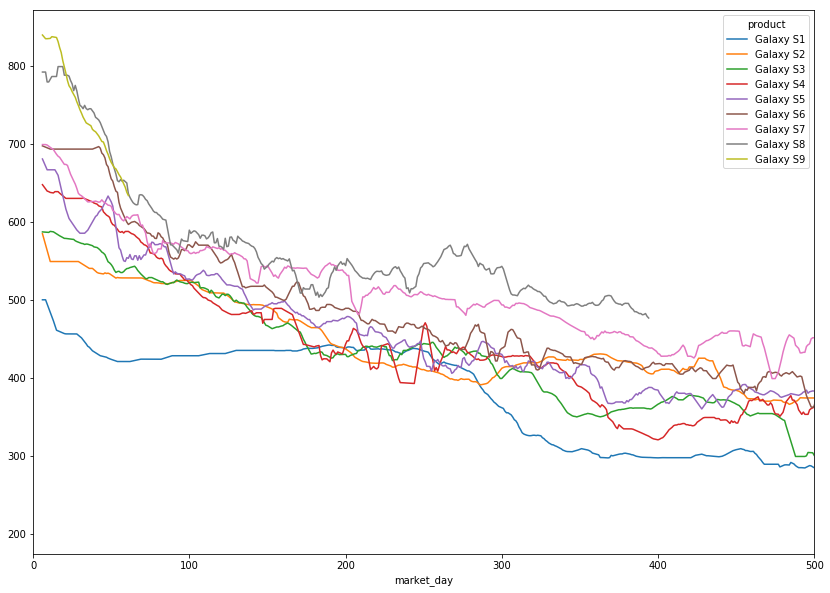

In [80]:
df_show = df_target.pivot_table(index='market_day', columns='product', values='price_avg_week')
df_show.plot(y=product_names, kind="line", figsize=(14,10), xlim=(0,500))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


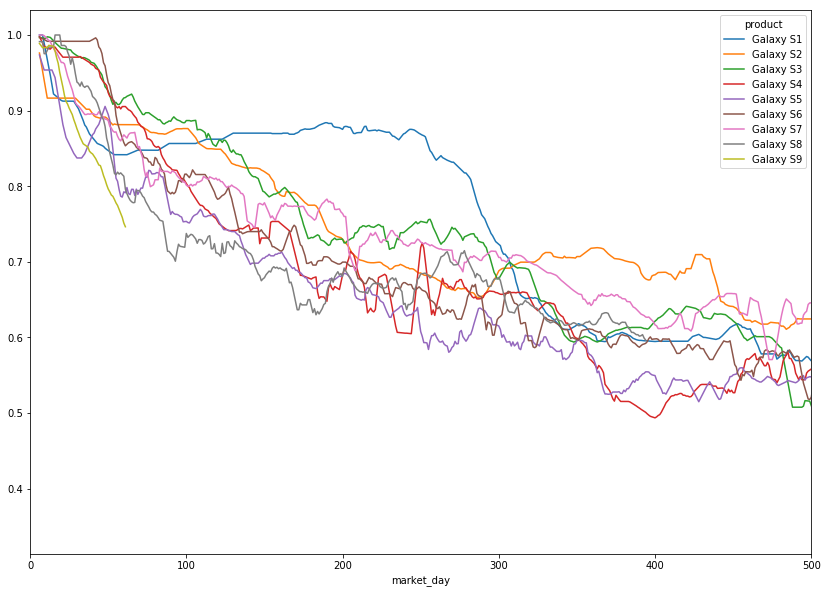

In [82]:
df_show = df_target.pivot_table(index='market_day', columns='product', values='price_perc_week')
df_show.plot(y=product_names, kind="line", figsize=(14,10), xlim=(0,500))

## Analyse: Apple / Iphone

In [83]:
product_list = [
    #[0, 'Iphone 2G 4GB', 235209],
    [1, 'iPhone 3GS 16GB schwarz', 437859],
    [2, 'iPhone 4 16GB schwarz', 538203],
    [3, 'iPhone 4s 32GB schwarz', 687506],
    [4, 'iPhone 5 32GB schwarz', 837397],
    [5, 'iPhone 5s 32GB grau', 999652],
    [6, 'iPhone 6 64GB grau', 1163684],
    [7, 'iPhone 6s 64GB', 1322880],
    [8, 'iPhone 7 128GB schwarz', 1504572],
    [9, 'iPhone 8 64GB grau', 1688628],
    [10, 'iPhone 7 128GB schwarz', 1504572],
    #[11, 'iPhone X 256GB grau', 1688652]
]

product_names = []
for n in product_list:
    product_names.append(n[1])

df_target = pd.DataFrame()

for product in product_list:
    url = 'https://geizhals.de/?phist='+str(product[2])+'&age=9999'
    r = requests.get(url).text
       
    prices = r.split('_gh.plot(')[1].split(', ')[1]
    prices = ast.literal_eval(prices)
    
    df = pd.DataFrame.from_dict(prices)
    df.columns = ['timestamp', 'price']
    
    df['timestamp'] = df['timestamp'].apply(lambda x: x / 1000)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
       
    df['product'] = product[1]
    df['market_day'] = df.index
    df['price_avg_week'] = df['price'].rolling(7).mean()
    df['price_perc'] = df['price'] / df['price'][0]
    df['price_perc_week'] = df['price_perc'].rolling(7).mean()
    
    df = df[df['market_day'] < 1000]
    
    df_target = df_target.append(df, ignore_index=True)
    
    time.sleep(1)

In [84]:
df_target.head()

,timestamp,price,product,market_day,price_avg_week,price_perc,price_perc_week
0,2009-06-18,859.01,iPhone 3GS 16GB schwarz,0,NaN,1.0,NaN
1,2009-06-19,859.01,iPhone 3GS 16GB schwarz,1,NaN,1.0,NaN
2,2009-06-20,859.01,iPhone 3GS 16GB schwarz,2,NaN,1.0,NaN
3,2009-06-21,859.01,iPhone 3GS 16GB schwarz,3,NaN,1.0,NaN
4,2009-06-22,859.01,iPhone 3GS 16GB schwarz,4,NaN,1.0,NaN


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


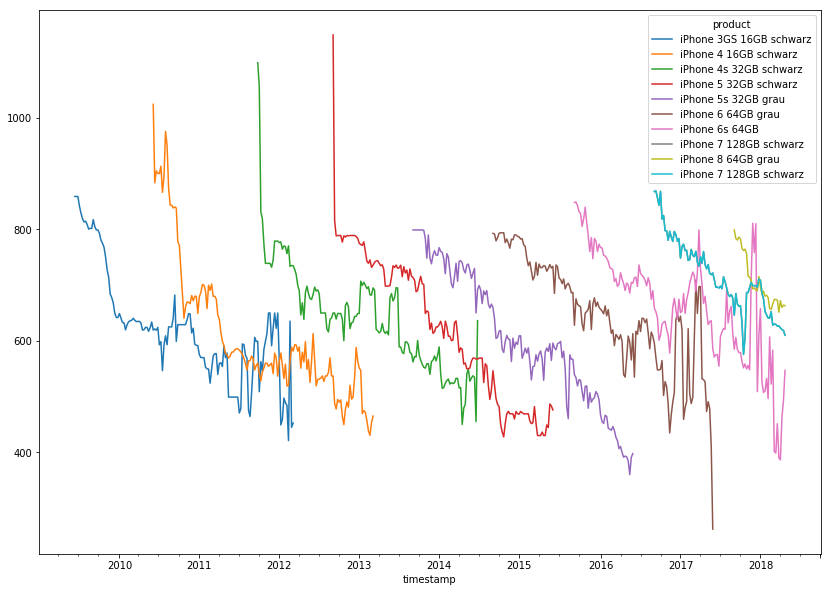

In [85]:
df_show = df_target.pivot_table(index='timestamp', columns='product', values='price')
df_show = df_show.resample('7D').mean()
df_show.plot(y=product_names, kind="line", figsize=(14,10))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


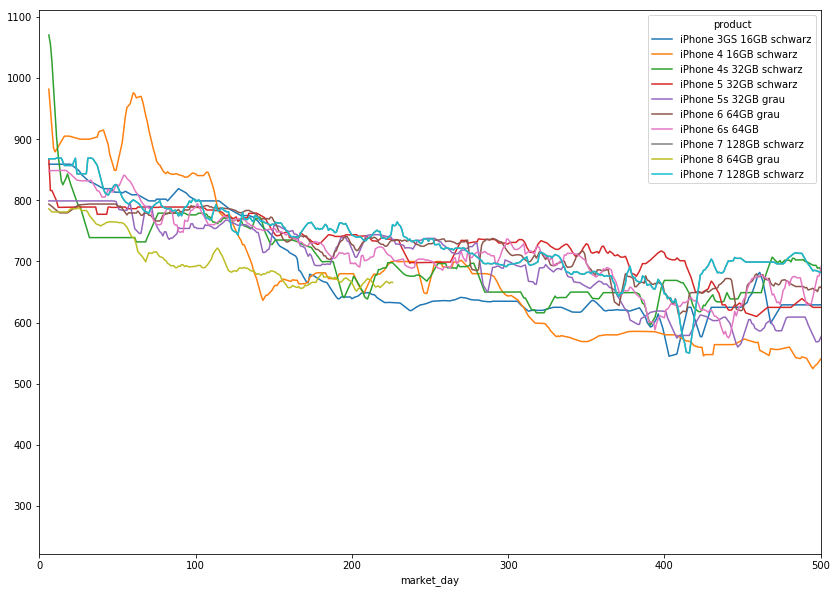

In [86]:
df_show = df_target.pivot_table(index='market_day', columns='product', values='price_avg_week')
df_show.plot(y=product_names, kind="line", figsize=(14,10), xlim=(0,500))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


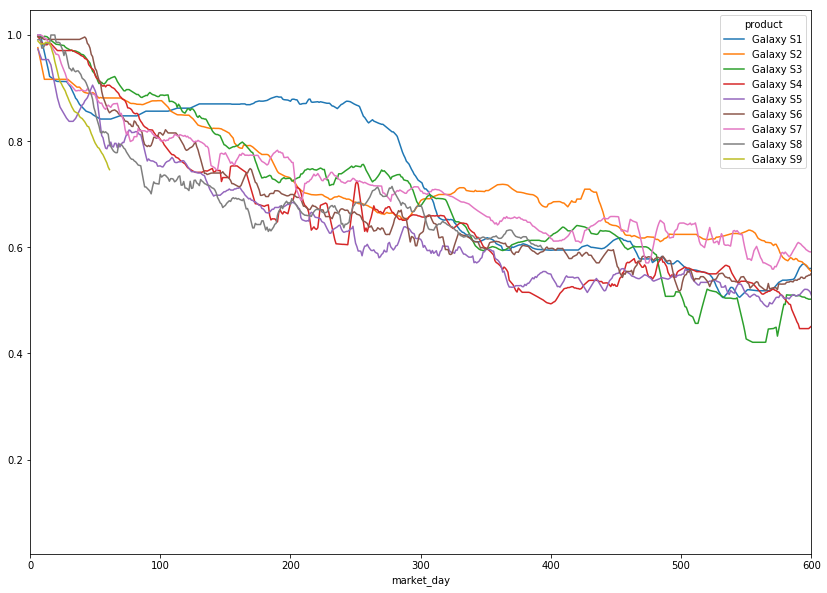

In [77]:
df_show = df_target.pivot_table(index='market_day', columns='product', values='price_perc_week')
df_show.plot(y=product_names, kind="line", figsize=(14,10), xlim=(0,600))